# Experiment 3: Visual Evaluation
Check the image segmentation performance of models visually and see how well they perform.

In [1]:
# Import section
import os
import torch
import sys
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)
os.chdir(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [3]:
from models.unet import UNet
from util.data_loader import get_seg_data_loaders
from evaluation.metrics import iou, pixel_accuracy

In [4]:
model_types = ['unet', 'autoencoder_segmentation', 'clip']
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_selected = model_types[0]
model_file = "unet_2025-03-10_23-23-51_val_0.2409.pth"
_, _, test_loader = get_seg_data_loaders()

model_path = os.path.join(os.getcwd(), "weights",
                          model_selected, model_file)
model = UNet()
model.load_state_dict(torch.load(model_path, map_location=device))

/var/folders/dq/yzrg8p7j73b5hxjf4yq2g_b40000gn/T/ipykernel_5821/165274098.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, m

<All keys matched successfully>

In [5]:
model.eval()
total_loss = 0
with torch.no_grad():
    for batch_id, (images, masks) in enumerate(test_loader):
        images, masks = images.to(device), masks.to(device)
        outputs = model(images)
        break
        

In [6]:
def show_image(image):
    plt.imshow(image)
    plt.axis("off")
    plt.show()
  

def show_colored_mask(mask):
    """
    Display a segmentation mask with:
      - 0 as purple
      - 1 as yellow
      - 2 as blue
    """
    # Define a custom colormap. Each entry is (R, G, B) in [0..1].
    # Here:
    #   0 -> purple (128/255, 0, 128/255)
    #   1 -> yellow (1, 1, 0)
    #   2 -> blue   (0, 0, 1)
    colors = [
        (128/255, 0, 128/255),  # class 0 (purple)
        (1, 1, 0),              # class 1 (yellow)
        (0, 0, 1),              # class 2 (blue)
    ]
    cmap = ListedColormap(colors)

    # vmin=0, vmax=2 ensures mask values are mapped exactly
    # to the three colors in the colormap.
    plt.imshow(mask, cmap=cmap, vmin=0, vmax=2)
    plt.axis("off")
    plt.show()

In [7]:
idx = 5

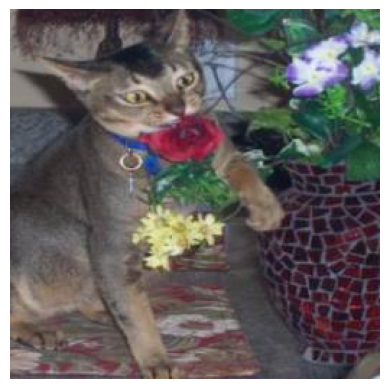

In [8]:
image = images[idx].permute(1, 2, 0)
show_image(image)

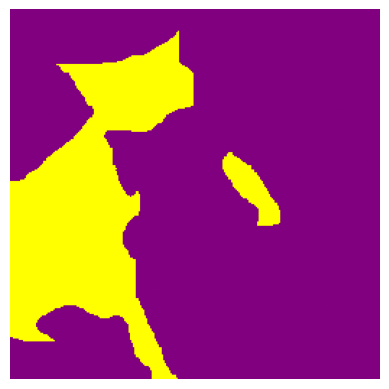

In [9]:
mask = masks[idx]
show_colored_mask(mask)

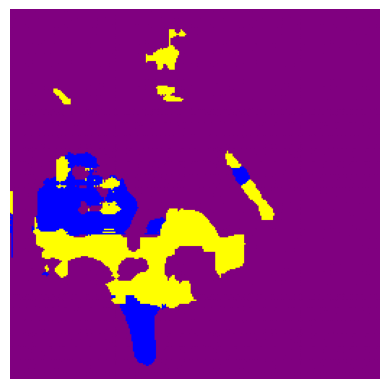

In [10]:
output = outputs[idx]
final_mask = torch.argmax(output, dim=0)
show_colored_mask(final_mask)

In [11]:
print((final_mask == 1).sum())
print((final_mask == 2).sum())
print((mask == 1).sum())
print((mask == 2).sum())

tensor(5227)
tensor(3414)
tensor(14941)
tensor(0)


In [12]:
iou(final_mask, mask)

[tensor([0.7943]), tensor([0.1431]), tensor([0.])]


0.31243422627449036

In [13]:
pixel_accuracy(final_mask, mask)

0.764556884765625